![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
bikes.groupby('season').total.describe()
# Análisis descriptivo
# La mayoría de alquileres ocurre en verano., seguido por otoño.

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
bikes.groupby('hour').total.describe()
# Análisis descriptivo
# La mayoría de alquileres ocurre a las 8 am, y a las 5 y 6 pm.
# Hay alquiler las 24 horas del día, baja considerablemente a las 3 y 4 am.

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

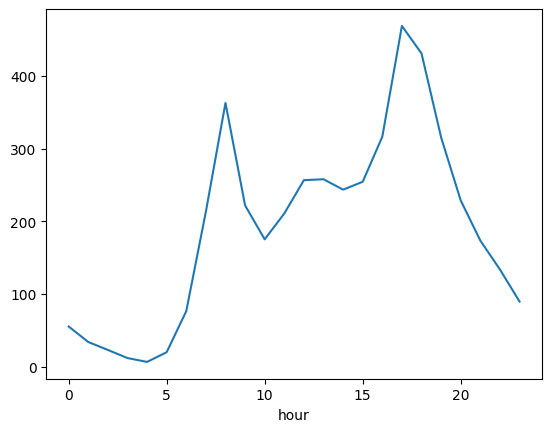

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

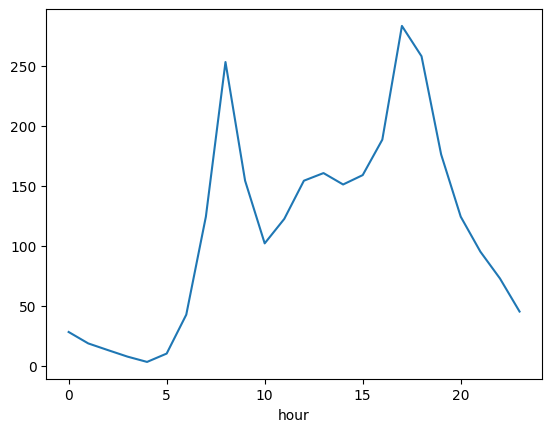

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

winter_filter = bikes['season'] == 1
bikes.where(winter_filter).dropna().groupby('hour').total.mean().plot()
# Análisis
# Los picos de alquiler de bicicletas es a las 8 am y 5 pm. Llama la atención que hay alquiler al rededor de la media noche. 


<Axes: xlabel='hour'>

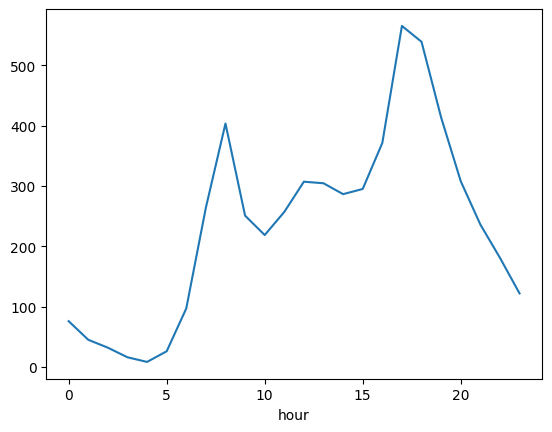

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

summer_filter = bikes['season'] == 3
bikes.where(summer_filter).dropna().groupby('hour').total.mean().plot()
# Análisis
# Los picos están a las 8 am y 6 pm, se mantiene el comportamiento de invierno pero la escala es el doble. 
# Hay un descenso de los alquileres al medio día, pero es menos pronunciado que en invierno.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

x_bikes = bikes.iloc[: , [0,11]]
y_bikes = bikes.total

bikes_lr = LinearRegression()
bikes_lr.fit(x_bikes, y_bikes)

#test_bikes = pd.DataFrame([[3,18]], columns=['season', 'hour'])

test_bikes = bikes.iloc[: , [0,11]]

y_pred = bikes_lr.predict(test_bikes)

# Coeficientes:
y_pred

print('LinearRegression, mse: ' + str(np.sqrt(mean_squared_error(y_pred, y_bikes))))

print(cross_val_score(bikes_lr, x_bikes, y_bikes, cv=10, scoring='r2').mean())



# Las limitaciones del modelo de regresión lineal es que la predicción no corresponde al comportamiento camibiante 
# de la realidad, por ejemplo los resultados no reflejan las subidad y bajadas del alquiler según el horarios del día.


LinearRegression, mse: 163.21774580166448
-0.477069639139524


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4

max_depth = None
num_pct = 6
max_features = None
min_gain=0.001

# Separación de variables predictoras (X) y variable de interes (y)
X = bikes.iloc[: , [0,11]]
y = bikes.total

#Split por season
s = 0
k_s=2
h = 1
k_h=5

splits_season = np.percentile(X.iloc[:, s], np.arange(0, 100, 100.0 / num_pct).tolist())
splits_hour = np.percentile(X.iloc[:, h], np.arange(0, 100, 100.0 / num_pct).tolist())
filter_h = X.iloc[:, h] < splits_hour[k_h]
filter_s = X.iloc[:, s] < splits_season[k_s]


y_s_l = y.loc[filter_s]
y_s_r = y.loc[~filter_s]


y_h_l = y.loc[filter_h]
y_h_r = y.loc[~filter_h]



# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_


gini_impurity(X.iloc[:, h], y, splits_hour[k_h]), gini_impurity(X.iloc[:, s], y, splits_season[k_s])

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

j, split, gain = best_split(X, y)

filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]
y.shape[0], y_l.shape[0], y_r.shape[0]
y.mean(), y_l.mean(), y_r.mean()


def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=10, num_pct=num_pct)
tree

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

# Ejecución de función tree_predict
predicted = tree_predict(X, tree)
predicted

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

DecisionTreeClassifier, mse: 158.92603749569844


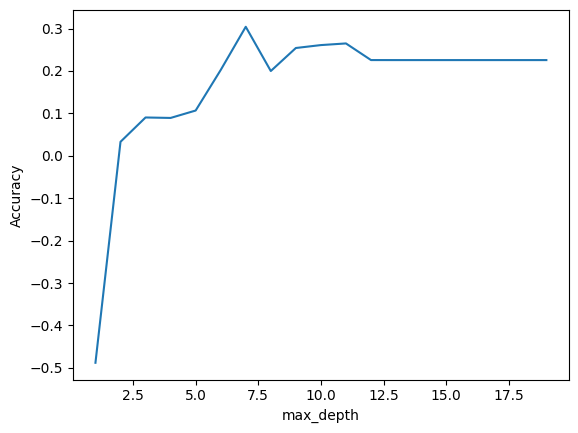

In [13]:
# Celda 5

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

max_depth_range = range(1, 20)
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='r2').mean())


#test_bikes = pd.DataFrame([[3,18]], columns=['season', 'hour'])


clf = DecisionTreeClassifier(max_depth=20, random_state=1)
test_bikes = bikes.iloc[: , [0,11]]

clf.fit(x_bikes, y_bikes)
y_pred = clf.predict(test_bikes)

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

print('DecisionTreeClassifier, mse: ' + str(np.sqrt(mean_squared_error(y_pred, y_bikes))))

# Comentario
# LinearRegression, mse: 163.21774580166448
# DecisionTreeClassifier, mse: 158.92603749569844
# El MSE del árbol es menor que el de RL, de tal manera que es más preciso.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [14]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [15]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [16]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [23]:
# Celda 6

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Para visualizar en que profundidad se estabiliza el accuracy 
#
# max_depth_range = range(1, 30)
# accuracy_scores = []
# f1_scores = []

# for depth in max_depth_range:
#     # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
#     dt = DecisionTreeClassifier(max_depth=depth, random_state=1)
#     accuracy_scores.append(cross_val_score(dt , X_train, y_train, cv=10, scoring='accuracy').mean())
#     f1_scores.append(cross_val_score(dt , X_train, y_train, cv=10, scoring='f1').mean())

# # Gráfica max_depth versus RMSE (error del modelo)
# plt.plot(max_depth_range, accuracy_scores)
# plt.plot(max_depth_range, f1_scores)
# plt.xlabel('max_depth')
# plt.ylabel('accuracy/f1')

models = {'lr': LinearRegression(),
          'dt': DecisionTreeRegressor(max_depth=30, random_state=1)}


# Entrenamiento (fit) de cada modelo
for model in models.keys():
    models[model].fit(X_train, y_train)

# Predicción de las observaciones del set de test para cada modelo
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

# Evaluación  del error promedio de las predicciones
np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

lr 0.4680731316538572
dt 0.6762642481555071


0.5275302590949452

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [18]:
# Celda 7

from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

clfs = {
            'dt1': BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=21), 
                    n_estimators=100, bootstrap=True, random_state=42, n_jobs=-1, oob_score=True),
            'dt2': BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10), 
                    n_estimators=100, bootstrap=True, random_state=42, n_jobs=-1, oob_score=True)}

y_pred = pd.DataFrame(index=X_test.index, columns=clfs.keys())
# Predicción y desempeño al hacer votación mayoritaria
for clf in clfs:
    clfs[clf].fit(X_train, y_train)
    y_pred[clf] = clfs[clf].predict(X_test)

# Evaluación del error de cada modelo
for clf in clfs:
    print(clf,metrics.f1_score(y_pred[clf], y_test),metrics.accuracy_score(y_pred[clf], y_test))

np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

# Comparación
#
# El error del esamble (0,57) es considerablemente menor que el del los árboles por separado, al rededor de 0,65

dt1 0.6490765171503959 0.6453333333333333
dt2 0.6596306068601584 0.656


0.5721305212391079

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [19]:
# Celda 8

clfs = {
            'dt1': BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=21), 
                    n_estimators=100, bootstrap=True, random_state=42, n_jobs=-1, oob_score=True),
            'dt2': BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10), 
                    n_estimators=100, bootstrap=True, random_state=42, n_jobs=-1, oob_score=True)}

y_pred = pd.DataFrame(index=X_test.index, columns=clfs.keys())
# Predicción y desempeño al hacer votación mayoritaria
for clf in clfs:
    clfs[clf].fit(X_train, y_train)
    y_pred[clf] = clfs[clf].predict(X_test)

# Evaluación del error de cada modelo

for clf in clfs:
    errors = np.zeros(clfs[clf].n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], clfs[clf].n_estimators))

    for i in range(clfs[clf].n_estimators):
        oob_sample = ~clfs[clf].estimators_samples_[i]
        y_pred_ = clfs[clf].estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = clfs[clf].estimators_[i].predict(X_test)
        
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred[clf] = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

# Desempeño al hacer votación ponderada
for clf in clfs:
    print(clf,metrics.f1_score(y_pred[clf], y_test),metrics.accuracy_score(y_pred[clf], y_test))

np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

dt1 0.652230971128609 0.6466666666666666
dt2 0.6523201075991929 0.6553333333333333


0.570233870150368

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [20]:
# Celda 9

# La diferencia entre los resultados de  Votación ponderada y mayoritaria es insignificante.
# La ventaja que veo en votación ponderada es que aprovecha las observaciones oob.
# La ejecución de Votación mayoritaria es un poco más rápida que con votación ponderada.
